In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


import chardet

with open('IDE-1997-2017.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))

print(result['encoding'])

ISO-8859-1


In [2]:
df=pd.read_csv('IDE-1997-2017.csv', encoding=result['encoding'])
display(df.head())
print("-----------------------------------")
print(df.columns)

,AÑO,INEGI,ENTIDAD,MODALIDAD,TIPO,SUBTIPO,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,ABUSO DE CONFIANZA,ABUSO DE CONFIANZA,17,17,17,17,17,17,32,0,38,28,22,31
1,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,DAÑO EN PROPIEDAD AJENA,DAÑO EN PROPIEDAD AJENA,45,45,45,45,45,45,108,40,117,38,73,133
2,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,EXTORSION,EXTORSION,0,0,0,0,0,0,0,0,0,0,0,0
3,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,FRAUDE,FRAUDE,9,9,9,9,9,9,52,0,55,51,42,44
4,1997,1,AGUASCALIENTES,DELITOS PATRIMONIALES,DESPOJO,CON VIOLENCIA,0,0,0,0,0,0,0,0,0,0,0,0


-----------------------------------
Index(['AÑO', 'INEGI', 'ENTIDAD', 'MODALIDAD', 'TIPO', 'SUBTIPO', 'ENERO',
       'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO',
       'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'],
      dtype='object')


In [3]:
print(pd.unique(df['ENTIDAD']))
print("-----------------------------------")


['AGUASCALIENTES' 'BAJA CALIFORNIA' 'BAJA CALIFORNIA SUR' 'CAMPECHE'
 'COAHUILA' 'COLIMA' 'CHIAPAS' 'CHIHUAHUA' 'CIUDAD DE MEXICO' 'DURANGO'
 'GUANAJUATO' 'GUERRERO' 'HIDALGO' 'JALISCO' 'MEXICO' 'MICHOACAN'
 'MORELOS' 'NAYARIT' 'NUEVO LEON' 'OAXACA' 'PUEBLA' 'QUERETARO'
 'QUINTANA ROO' 'SAN LUIS POTOSI' 'SINALOA' 'SONORA' 'TABASCO'
 'TAMAULIPAS' 'TLAXCALA' 'VERACRUZ' 'YUCATAN' 'ZACATECAS']
-----------------------------------


In [4]:
df=df.query('ENTIDAD == "CIUDAD DE MEXICO" and TIPO == "SECUESTRO"')
print("-----------------------------------")
print(pd.unique(df['SUBTIPO']))

-----------------------------------
['SECUESTRO']


In [5]:
df=df.drop(['INEGI', 'ENTIDAD', 'TIPO', 'SUBTIPO'], axis=1)
df.head()

,AÑO,MODALIDAD,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
549,1997,PRIV. DE LA LIBERTAD (SECUESTRO),2,2,1,3,6,8,0,0,0,0,0,0
2661,1998,PRIV. DE LA LIBERTAD (SECUESTRO),4,3,5,4,4,8,3,4,8,6,4,13
4773,1999,PRIV. DE LA LIBERTAD (SECUESTRO),3,8,8,12,15,10,10,13,0,14,12,15
6885,2000,PRIV. DE LA LIBERTAD (SECUESTRO),4,11,11,6,14,20,14,12,14,10,17,8
8997,2001,PRIV. DE LA LIBERTAD (SECUESTRO),0,10,16,11,13,10,7,11,15,16,17,22


In [6]:
df=df.melt(id_vars=['AÑO', 'MODALIDAD'], var_name='Mes', value_name="Numero_registros")
display(df.head())

,AÑO,MODALIDAD,Mes,Numero_registros
0,1997,PRIV. DE LA LIBERTAD (SECUESTRO),ENERO,2
1,1998,PRIV. DE LA LIBERTAD (SECUESTRO),ENERO,4
2,1999,PRIV. DE LA LIBERTAD (SECUESTRO),ENERO,3
3,2000,PRIV. DE LA LIBERTAD (SECUESTRO),ENERO,4
4,2001,PRIV. DE LA LIBERTAD (SECUESTRO),ENERO,0


In [7]:
df['Numero_registros']=df['Numero_registros'].fillna(0)
print(df.isna().sum)


<bound method DataFrame.sum of        AÑO  MODALIDAD    Mes  Numero_registros
0    False      False  False             False
1    False      False  False             False
2    False      False  False             False
3    False      False  False             False
4    False      False  False             False
..     ...        ...    ...               ...
247  False      False  False             False
248  False      False  False             False
249  False      False  False             False
250  False      False  False             False
251  False      False  False             False

[252 rows x 4 columns]>


In [8]:
df=df.query(' Numero_registros != 0')
df.head()
print(pd.unique(df['AÑO']))
print(df.shape)

[1997 1998 1999 2000 2002 2003 2004 2005 2006 2007 2008 2009 2010 2012
 2013 2014 2015 2016 2017 2001 2011]
(242, 4)


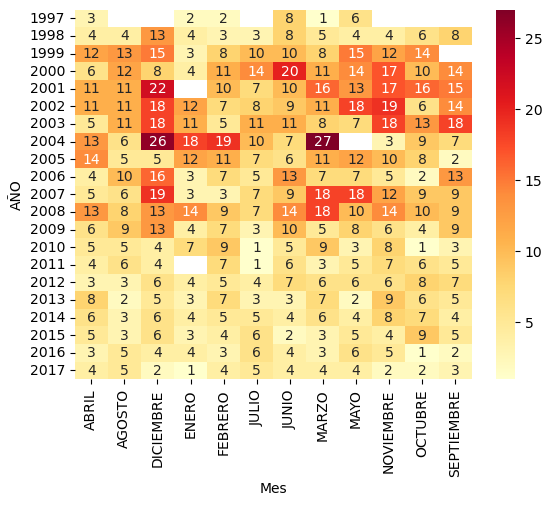

In [9]:
multi_indice=df.pivot_table(index="AÑO", columns="Mes", values="Numero_registros", aggfunc="sum")
sns.heatmap(multi_indice, annot=True, fmt=".0f", cmap="YlOrRd")
plt.show()

In [10]:
diferencia_06_07= multi_indice.loc[2007] - multi_indice.loc[2006]
print(diferencia_06_07.sum())
print("-----------------------------------")

diferencia_06_07= multi_indice.loc[2007] - multi_indice.loc[2006]

26.0
-----------------------------------


In [11]:
pivot_filled = multi_indice.fillna(0)
from sklearn.cluster import KMeans

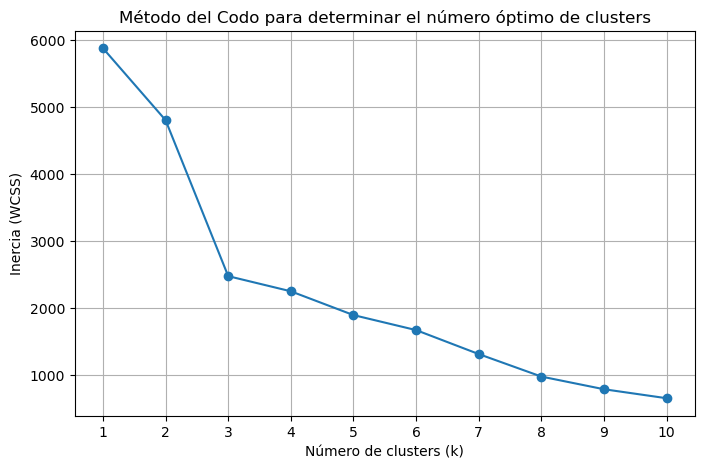

In [12]:
K = range(1, 11)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivot_filled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia (WCSS)')
plt.xticks(K)
plt.grid(True)
plt.show()


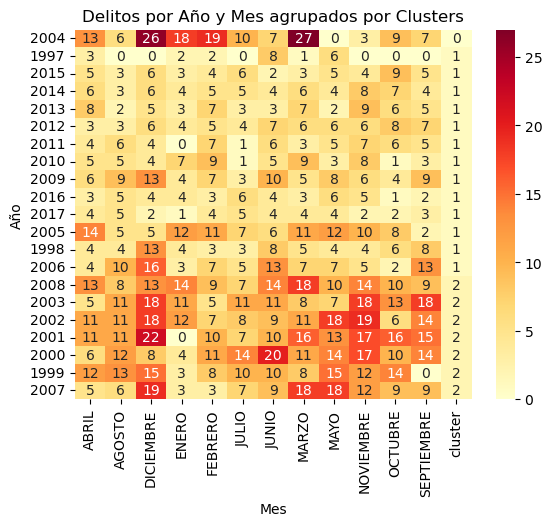

In [13]:
k_optimo = 3

kmeans = KMeans(n_clusters=k_optimo, random_state=42)
clusters = kmeans.fit_predict(pivot_filled)

# Añadir columna de cluster al DataFrame
pivot_filled['cluster'] = clusters

# Ordenar los años por cluster para visualizar mejor
pivot_sorted = pivot_filled.sort_values('cluster')

# Graficar heatmap sin la columna de cluster
sns.heatmap(pivot_sorted, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Delitos por Año y Mes agrupados por Clusters")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.show()